<a href="https://colab.research.google.com/github/sytan98/Machine-Learning-With-Tensorflow/blob/master/Ex4_Emotions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-05-29 07:26:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-05-29 07:26:52 (122 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



##Data Preprocessing


In [2]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')
print(train_generator.classes[0])
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.
0


Using TensorFlow backend.


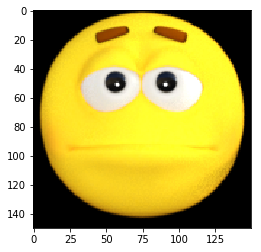

In [3]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

##Training the model


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150, 150, 3), padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)
])

model.summary()
from tensorflow.keras.optimizers import RMSprop
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = adam, loss='binary_crossentropy', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flat

In [5]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])

    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
80/80 [==============================] - 2s 26ms/step - loss: 0.4729 - acc: 0.7500
Epoch 2/15
80/80 [==============================] - 1s 13ms/step - loss: 0.2474 - acc: 0.9125
Epoch 3/15
80/80 [==============================] - 1s 14ms/step - loss: 0.1008 - acc: 0.9500
Epoch 4/15
80/80 [==============================] - 1s 13ms/step - loss: 0.0682 - acc: 0.9875
Epoch 5/15
80/80 [==============================] - 1s 14ms/step - loss: 0.0429 - acc: 0.9875
Epoch 6/15
79/80 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
80/80 [==============================] - 1s 13ms/step - loss: 0.0017 - acc: 1.0000


##Running the Model

Saving smiley-163510_640.jpg to smiley-163510_640 (2).jpg
[1.]
smiley-163510_640.jpg is happy


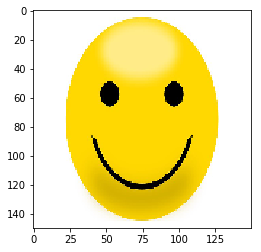

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")
 

## Visualizing Intermediate Representations

In [0]:
# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

train_happy_names = os.listdir(train_happy_dir)
train_sad_names = os.listdir(train_sad_dir)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


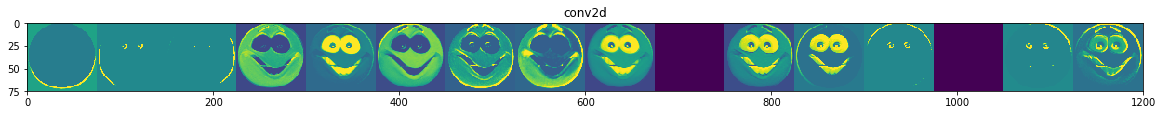

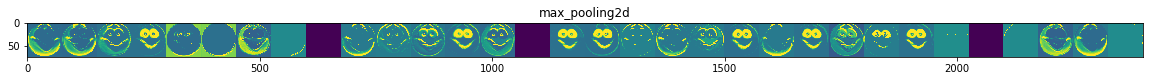

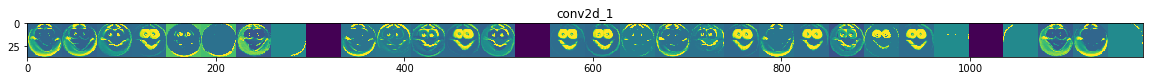

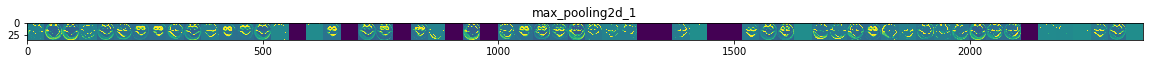

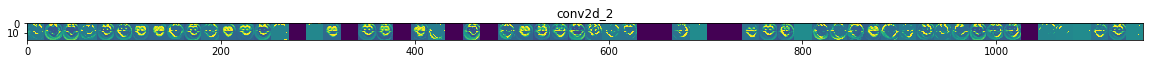

In [8]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
happy_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_names]
sad_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_names]
img_path = random.choice(happy_img_files + sad_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')